#### Stroke Prediction : Capstone Project, Udacity Data Science Nanodegree 

## Table of Contents
* [Introduction](#int)
* [Data Understanding](#load)
 * [Exploratory Data Analysis](#eda)
* [Data Prep](#prep)
 * [Feature Extraction](#fext)
 * [Train test Split](#ttsplit)
* [Modeling](#model)
* [Conclusions](#conclude)

## Introduction
<a class="anchor" id="int"></a>

According to WHO (World Health Organization) is the second leading cause of death globally, being responsible for about 11% of the total deaths.

In this project I will be loading and manipulating a patients dataset with pandas and sklearn to engineer relevant features for predicting stroke. The Stroke prediction data contains information about a set of 5110 patients,  collecting basic health details, measures and their lifestyle choices. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. 

We will be comparing few machine learning models and then choosing the best machine learning model that predict the chances of Stroke in the patients. 

In [1]:
# import libraries
import time
import pandas as pd
import numpy as np
import seaborn  as sns

from IPython.display import display 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline


## Data Understanding
<a class="anchor" id="load"></a>
Our dataset file is `healthcare_dataset_stroke_data.csv`. First the dataset must be loaded, cleaned, evaluated and Preped. For e.g., checking for invalid or missing data - for example, records without key features like Age, Hypertension, Average glucose level, BMI etc.

In [2]:
# read csv file and look at the data 
df = pd.read_csv("healthcare_dataset_stroke_data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Let's look at how pandas infered the schema of the orginal dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Let's get the counts of Nulls in all the columns
df.isnull().value_counts()

id     gender  age    hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi    smoking_status  stroke
False  False   False  False         False          False         False      False           False              False  False           False     4909
                                                                                                               True   False           False      201
dtype: int64

In [5]:
# Looks like 'bmi' is the only column with Null values in it.
df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


> There are 5110 rows and 12 columns which is of a decent size, and except 'bmi' all other columns are with no nulls 

> Stroke is the prediction target for our model. It takes two values: 1 if the participant had a stroke and 0 if the participant didn’t.

> Stroke column is a numeric type , that means we dont have to convert it.

> "Unknown" in smoking_status means that the information is unavailable for this patient

In [6]:
#Lets double check if we are correct about 'bmi' being the only column with Nulls in it.
#df_bmi_na=df[df['bmi'].isnull()]
#df_bmi_na.isna().value_counts()
df[df['bmi'].isnull()].isna().value_counts()

id     gender  age    hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi   smoking_status  stroke
False  False   False  False         False          False         False      False           False              True  False           False     201
dtype: int64

In [7]:
# Confirming the total number of NaN values in the bmi column
df['bmi'].isnull().sum()

201

> We have 201 NaN values for the BMI column, which is nearly less than 4% of the total records.

> Since BMI is one of the key features in our dataset, I would rather impute values than delete those records with missing values.

> To impute values I will be using the Forward Fill, Back Fill methods to populate values in the BMI column, after the DF is sorted by Gender and Age, and grouped by Gender.

In [8]:
#Imputing the missing values in the BMI column, using ffill, bfill methods and then checking the NaN value counts in the df
df['bmi'] = df.sort_values(by=['gender','age']).groupby('gender')['bmi'].fillna(method='ffill').fillna(method='bfill')
df.isna().value_counts()

id     gender  age    hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi    smoking_status  stroke
False  False   False  False         False          False         False      False           False              False  False           False     5110
dtype: int64

> We do not have any NaN values in any of the columns in our DF now.

In [9]:
# Let's make all the column names case normalized for consistency sake
df.columns = df.columns.str.lower()

In [10]:
# look at the new column names to ensure the names are all case normalized
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

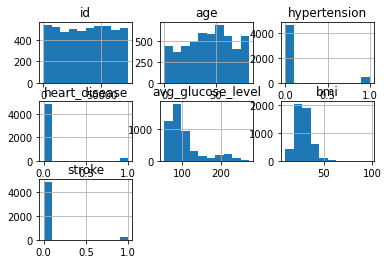

In [11]:
# let's look at the distribution of numerical columns of our dataframe
df.hist();

> The age column has a good distribution of patients ranging from 8 months to 82 years. The number patients with heart disease is < 300, number of patients with hypertesnion is less than 500 and number of patients with a previous history of Stroke is 
less than 250. 

> The Average Glucose level column has mixed distribution, with majority of the patients having less than 200 Avg_Glucose_Levels

In [12]:
# The columns (hypertension and heart_disease) show as integer datatype (1,0) , lets convert them into an object datatype
df["hypertension"]=df["hypertension"].astype("object")
df["heart_disease"]=df["heart_disease"].astype("object")

In [13]:
#Lets check the schema of the updated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 479.2+ KB


> This now gives us two more additional categorical eatures in our dataset, viz. Hypertension and Heart_Disease

##### Exploratory data analysis
<a class="anchor" id="eda"></a>
Looking forward to at the data in a ML modelling perspective and understanding it beforehand, is crucial step in building a succesfull machine learning model.
We should always look for missing values, distribution of values in target variable, number of unique categorical values etc.

> Look for any additional null handling needs in the dataset

In [14]:
# check for null values in the df_train_full
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

> We do not have any null values to handle

> Let us look at the distribution and description of the few key column's values.

In [15]:
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [16]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [17]:
df.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [18]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [19]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

> Let us also look at the cardinality of the categorical features' values.

In [20]:
# print the number of unique values in each of the categorical column
df.select_dtypes(include="object").nunique()

gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

> The categorical columns have low cardinality which is good news. That means we do not have to perform any additional handling of the values as of now.

> Let's check the distribution of target values

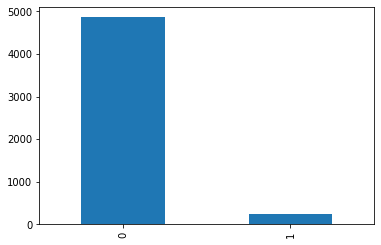

In [21]:
# Lets first plot the distribution and get a visual
df.stroke.value_counts().plot(kind='bar');

In [22]:
# The distributin is imbalance, let's get the exact counts for the distribution
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

> The dataset is an imbalanced dataset since the number of patients with prior history of Stroke (nearly 250) is way less than the patients that do not have a prior history of Stroke (less than 4900)

In [23]:
# check for the overall Stroke rate
stroke_avg=df["stroke"].mean()
stroke_avg*100

4.87279843444227

> The Stroke rate for the patient population in our dataset is around 4.8%

> Lets calculate the Risk Ratio for all the categorical features to check for Stroke risk across all groups in those features

In [24]:
# create a list of variables whose data type is object and assign it to a categorical variable 
cat_var=list(df.select_dtypes(include="object").columns)

In [25]:
# lets display the risk rate for all the groups in the cat_var list
for col in cat_var:
    df_group = df.groupby(col)["stroke"].agg(["mean"])
    df_group["rate"] = df_group["mean"]/stroke_avg
    display(df_group)
    

,mean,rate
gender,,
Female,0.047094,0.966471
Male,0.051064,1.047936
Other,0.000000,0.000000


,mean,rate
hypertension,,
0,0.039679,0.814298
1,0.132530,2.719795


,mean,rate
heart_disease,,
0,0.041787,0.857563
1,0.170290,3.494703


,mean,rate
ever_married,,
No,0.016505,0.338725
Yes,0.065613,1.346513


,mean,rate
work_type,,
Govt_job,0.050228,1.030790
Never_worked,0.000000,0.000000
Private,0.050940,1.045399
Self-employed,0.079365,1.628737
children,0.002911,0.059744


,mean,rate
residence_type,,
Rural,0.045346,0.930596
Urban,0.052003,1.067212


,mean,rate
smoking_status,,
Unknown,0.030440,0.624701
formerly smoked,0.079096,1.623216
never smoked,0.047569,0.976209
smokes,0.053232,1.092431


> from the above results we can infer that Patients who are married males, who live in Urban areas, have smoked in past and/or present, who work (irrespective of the type viz. private, govt or self employed), who have prior history of Hypertension and Heart disease are at higher risk of Stroke (rate > 1.0).

Lets find out the most useful categorical features 

In [26]:
# write a function to calculate mutual info score using the mutual _info_score function from Scikit-learn
def calc_mutual_info(series):                                      
    return mutual_info_score(series, df["stroke"])     

# apply the newly created cal_mutual_info on each categorical feature of the data frame 
mutual_info = df[cat_var].apply(calc_mutual_info) 
mutual_info.sort_values()

gender            0.000051
residence_type    0.000120
smoking_status    0.002750
heart_disease     0.005897
hypertension      0.005976
work_type         0.006825
ever_married      0.006950
dtype: float64

> Of all the categorical features , except gender, residence_type, smoking_status (which are the least useful features) rest all are more useful features for our model.

Now let's look at how the numerical features are corelated with Stroke

<AxesSubplot:>

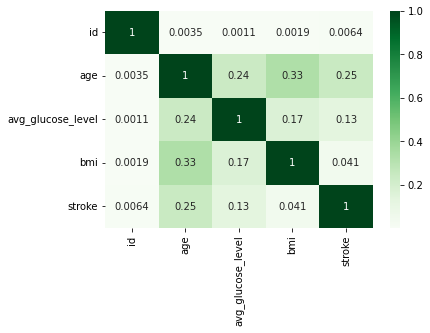

In [27]:
corr=df.corr()
sns.heatmap(corr,cmap="Greens",annot=True)

> Age, Avg_Glucose_Level and BMI all have a positive corelation with Stroke; as the values for these features go up the Stroke rate goes up.

## Data Prep
<a class="anchor" id="prep"></a>
After having a look at the data and finding out what can be useful for the model. Now we have a clear understanding on how other variables affect the target variable - Stroke. 

We now need to perform data prep steps; transforming all categorical variables to numeric features to prepare the data for ML model. 

##### Feature Extraction
<a class="anchor" id="fext"></a>

In [50]:
df_bmi=df.copy()
df_bmi.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.4,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [74]:
#df_bmi["bmi"][1]
#len(df_bmi["bmi"])
float(df_bmi["bmi"][4])#.astype('float64')
df_bmi["bmi"]=df["bmi"].astype("object")
df_bmi.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5486 entries, 0.0 to 14.9
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   float64
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   object 
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   float64
dtypes: float64(4), object(8)
memory usage: 686.2+ KB


In [81]:
for i in range(len(df_bmi['bmi'])):
    df_bmi["bmi"]=df["bmi"].astype("object")
    if (float(df_bmi['bmi'][i]) >= 40):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'ex_obese'
    elif ((float(df_bmi["bmi"][i])< 40)&(float(df_bmi["bmi"][i])>= 30)):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'obese'
    elif ((float(df_bmi["bmi"][i])< 30)&(float(df_bmi["bmi"][i])>= 25)):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'over'
    elif ((float(df_bmi["bmi"][i])< 25)&(float(df_bmi["bmi"][i])>= 19)):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'normal'
    else:
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'under'
                        
        
    
   # df_group = df_train_full.groupby(col)["churn"].agg(["mean"])
   # df_group["rate"] = df_group["mean"]/churn_avg
   # display(df_group)    .astype('float64')
    

KeyError: 5110

In [89]:
for i in range(len(df_bmi['bmi'])):
    df_bmi["bmi"]=df["bmi"].astype("object")
    if (float(df_bmi['bmi'][i]) > 40):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'ex_obese'
    elif ((float(df_bmi["bmi"][i])< 40)&(float(df_bmi["bmi"][i])>= 30)):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'obese'
    elif ((float(df_bmi["bmi"][i])< 30)&(float(df_bmi["bmi"][i])>= 25)):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'over'
    elif ((float(df_bmi["bmi"][i])< 25)&(float(df_bmi["bmi"][i])>= 19)):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'normal'
    else:
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'under'
        continue                          

KeyError: 5110

In [83]:
df_bmi[(df_bmi["bmi"]=='ex_obese')]['bmi'].value_counts()

Series([], Name: bmi, dtype: int64)

In [84]:
df_bmi[(df_bmi["bmi"]=='obese')]['bmi'].value_counts()

Series([], Name: bmi, dtype: int64)

In [85]:
df_bmi[(df_bmi["bmi"]=='over')]['bmi'].value_counts()

Series([], Name: bmi, dtype: int64)

In [86]:
df_bmi[(df_bmi["bmi"]=='normal')]['bmi'].value_counts()

Series([], Name: bmi, dtype: int64)

In [87]:
df_bmi[(df_bmi["bmi"]=='under')]['bmi'].value_counts()

Series([], Name: bmi, dtype: int64)

In [ ]:
df_bmi["bmi"]=df["bmi"].astype("float64")

In [ ]:
for i in len(df_bmi['bmi']):
    if df_bmi['bmi'][i] == (df_bmi["bmi"][i]>=40).astype(float64):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'ex_obese'
    elif df_bmi['bmi'][i] == ((df_bmi["bmi"][i]<40)&(df_bmi["bmi"][i]>=30)).astype(float64):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'obese'
    elif df_bmi['bmi'][i] == ((df_bmi["bmi"][i]<30)&(df_bmi["bmi"][i]>=25)).astype(float64):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'over'
    elif df_bmi['bmi'][i] == ((df_bmi["bmi"][i]<25)&(df_bmi["bmi"][i]>=19)).astype(float64):
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'normal'
    else:
        df_bmi.loc[df_bmi["bmi"][i], "bmi"] = 'under'
                        
        
    
    
    
   # df_group = df_train_full.groupby(col)["churn"].agg(["mean"])
   # df_group["rate"] = df_group["mean"]/churn_avg
   # display(df_group)
    

TypeError: 'int' object is not iterable

In [ ]:
#((df["BMI"]<25)&(df["BMI"]>=19)).value_counts().to_list()
#df_bmi.replace(to_replace=df_bmi[((df_bmi["bmi"]<25)&(df_bmi["bmi"]>=19))], value='normal', inplace=True)
#df_bmi.replace(to_replace=df_bmi[((df_bmi["bmi"]<25)&(df_bmi["bmi"]>=19))], value='normal', inplace=True)

df_bmi.loc[(df_bmi["bmi"]<19), "bmi"] = 'under'
df_bmi["bmi"]=df["bmi"].astype("float64")
df_bmi.loc[((df_bmi["bmi"]<25)&(df_bmi["bmi"]>=19)), "bmi"] = 'normal'
#df_bmi["bmi"]=df["bmi"].astype("float64")
#df_bmi.loc[((df_bmi["bmi"]<30)&(df_bmi["bmi"]>=25)), "bmi"] = 'over'
#df_bmi["bmi"]=df["bmi"].astype("float64")
#df_bmi.loc[((df_bmi["bmi"]<40)&(df_bmi["bmi"]>=30)), "bmi"] = 'obese'
df_bmi["bmi"]=df["bmi"].astype("float64")
df_bmi.loc[df_bmi["bmi"]>=40, "bmi"] = 'ex_obese'

#df_bmi['bmi'] = np.where(df_bmi["bmi"]>=40, 'ex_obese', df_bmi.bmi)

#df_bmi['bmi'].mask(((df_bmi["bmi"]<40)&(df_bmi["bmi"]>=30)), 'obese', inplace=True)
#df['gender'].mask(df['gender'] == 'female', 0, inplace=True)

#df.loc[df["gender"] == "male", "gender"] = 1

#cc_normal=((df["Race"]=='Cauc')&(df["BMI"]<25)&(df["BMI"]>=19)).value_counts().to_list()
#cc_over=((df["Race"]=='Cauc')&(df["BMI"]<30)&(df["BMI"]>=25)).value_counts().to_list()
#cc_obese=((df["Race"]=='Cauc')&(df["BMI"]<40)&(df["BMI"]>=30)).value_counts().to_list()
#cc_ex_obese=(((df["Race"]=='Cauc')&(df["BMI"]>=40)).value_counts()-208).to_list()

In [ ]:
df_bmi[(df_bmi["bmi"]=='ex_obese')]['bmi'].value_counts()
#df_bmi.bmi.value_counts()

ex_obese    428
Name: bmi, dtype: int64

In [ ]:
dataTrain = pd.get_dummies(df, columns=['work_type', 'smoking_status', 'gender'])
dataTrain.drop(columns=['id'], inplace=True)
dataTrain.replace(to_replace="Urban", value=1, inplace=True)
dataTrain.replace(to_replace="Rural", value=0, inplace=True)

dataTrain.replace(to_replace="Yes", value=1, inplace=True)
dataTrain.replace(to_replace="No", value=0, inplace=True)
dataTrain.head()

In [ ]:
dataTrain.info()

In [ ]:
#xData = dataTrain.to_numpy()

xData = dataTrain.astype('float32')
xData.info()

In [ ]:
# delete customerid column from the the train,val and test datasets as it has no bearing on our ML model
del df_train["customerid"]
del df_val["customerid"]
del df_test["customerid"]

In [ ]:
# lets take a look at the 
df_train.info()

In [ ]:
# lets create a list of dictionaries off of this dataframe and vectorize its elements before feeding it to our model
train_dict = df_train.to_dict(orient="records")
train_dict[0]

In [ ]:
# instantiate DictVectorizer and vectorize the train_dict using this object
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

In [ ]:
# convert the dictionaries to matrix using the transform method
X_train = dv.transform(train_dict)

In [ ]:
# lets look at the shape of X_train
X_train.shape

> we now have a matrix of 45 coulmns 

In [ ]:
# lets look at first row
X_train[0]

> all the values are now 0's and 1's except for the 3 categorical variables

In [ ]:
# lets take a look at the columns names
dv.get_feature_names_out()

> tenure , totalcharges and monthlycharges column names haven't changed because they are numerical variables 

In [ ]:
# lets now repeat the same process for df_val
val_dict = df_val.to_dict(orient="records")
val_dict[0]

In [ ]:
# vectorize val_dict using the tranform method and store in X_val
X_val = dv.transform(val_dict)

##### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

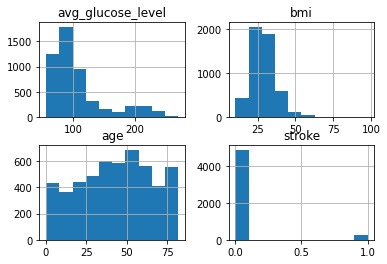

In [ ]:
#df.head(4)
#df.hist(df.columns in ['avg_glucose_level', 'bmi', 'age', 'stroke'], any);
#df.hist(df.columns in ['avg_glucose_level', 'bmi', 'age', 'stroke'], all);
#df_num=df[['avg_glucose_level', 'bmi', 'age', 'stroke']]
#df_num.hist();
df[['avg_glucose_level', 'bmi', 'age', 'stroke']].hist();


##### Split the Data in Train, Validation and Test splits
<a class="anchor" id="ttsplit"></a>


In [ ]:
# Using Sklearn train_test_split function to split the whole dataset into train and test split at a test size of 20% 
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=8)

In [ ]:
#checking the shape of df
df.shape

(5110, 12)

In [ ]:
# checking the shape of train and test splits
df_train_full.shape,df_test.shape

((4088, 12), (1022, 12))

In [ ]:
# checking to see if the test split is at 20% of the original dataframe
(df_test.shape[0]/df.shape[0])*100

20.0

> now that we have a train and a test split, lets split up the train set into train and validation sets

In [ ]:
# Using Sklearn train_test_split function to split the train dataset into train and val splits at a val size of 33% 
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=42)

In [ ]:
# checking to see if the val split is at 33% of the df_train_full dataframe
(df_val.shape[0]/df_train_full.shape[0])*100

33.02348336594912

> we have all the splits that we need , lets remove the churn values from the train and val splits and store them in different variables

In [ ]:
# storing df_train churn values and df_val churn values in seperate variables
y_train = df_train["churn"].values
y_val = df_val["churn"].values

KeyError: 'churn'

In [ ]:
# checking values in y_train
y_train

In [ ]:
# checking values in y_val
y_val

In [ ]:
# delete the churn values from the df_train and df_val dataframes
df_train= df_train.drop(columns="churn")
df_val= df_val.drop(columns="churn")

In [ ]:
# checking columns in df_val
df_val.head(1).T

In [ ]:
# checking columns in df_train
df_train.head(1).T

> the churn column has been succesfully removed from both the dataframes

## Modeling
<a class="anchor" id="model"></a>
After prepping the data by using Scikit-learn to perform one-hot encoding for categotrical variables we are now ready to build a ML model with the data

We will use classification algorithms since our problem is a binary classification in that we are predicting if a customer is likley to churn or not. 

We can test different ML algorithms including 

* Logisitic regression - avoids overfitting, good explainability and efficient to train
* Random Forest Classifier - ensemble method, avoids overfitting and deals well with imbalanced datasets like ours
* Naive Bayes - easy and fast implementation 

In [ ]:
# instantiate models
lr = LogisticRegression(solver="liblinear",random_state=1)# choosing liblinear initially as the dataset is small
rf = RandomForestClassifier(n_estimators=20,random_state=1)
nb = GaussianNB() 
# keep model objects here 
models =[lr,rf,nb]
# loop thru all the elements in the models list
for i in models:
    print("Model:", i)
    start = time.time()
    #fit using the train data
    i.fit(X_train, y_train)
    end = time.time()
    print("Time taken to train (seconds): ", end - start)
    predictions = i.predict(X_val)
    print("Accuracy: ",metrics.accuracy_score(y_val, predictions))
    print("F1: ",metrics.f1_score(y_val, predictions))
    print("\n")


> Out of the above estimators the Logistic Regression classifier delivered best results in terms of time taken to complete, Accuracy and F1 scores. So lets go with that estimator

Model Tuning

In [ ]:
# lets see what paramters we can tune
lr.get_params()

> we can use penalty, C , solver and max_iter params

In [ ]:
# create a parameter grid and use it to store various parameter values for logistic regression
param_grid = [    
    {'penalty' : ['l2'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [1000,2500, 5000]
    }
]

In [ ]:
# create an instance of GridSearchCV to perform an exhaustive search over the specified paramater values for logistic regression. Using 5 fold CV. 
clf = GridSearchCV(lr, param_grid = param_grid, cv = 5, n_jobs=-1, verbose=True,scoring="accuracy")

In [ ]:
# fit train data 
best_classifier = clf.fit(X_train,y_train)

In [ ]:
# print the best score  and the best paramaters 
print("Best: %f using %s" % (best_classifier.best_score_, best_classifier.best_params_))

> our best model achieved an accuracy of 0.80. Accuracy means the number of accurate predictions out of all the predictions. From the above results , we are able to accurately predict the 80 correct churns out of 100 total churn predictions using linear regression estimator with max iteration of 1000 , C of 0.1, l2 penalty and a lbfgs solver.  

In [ ]:
# lets see the confusion matrix using the best classifier's best estimator 
y_pred = best_classifier.best_estimator_.predict(X_val)

# heat map using sns and scikitlearn's confusion_matrix function
ax = sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show();

> there are 1216 true positives (predicted positive and it’s true) , 302 true negatives (predicted negative and it’s true), 134 false positives (predicted positive and it’s false) and 208 false negatives (You predicted negative and it’s false)

Best Estimator Feature Importance

In [ ]:
# get importance
feat_importance = best_classifier.best_estimator_.coef_[0]

# plot feature importance
plt.bar([x for x in range(len(feat_importance))], feat_importance)
plt.show();

>  Notice that the coefficients are both positive and negative. We have a total of 45 features and the positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0. No clear pattern of important and unimportant features can be identified from the above visualization

## Conclusion
<a class="anchor" id="conclude"></a>

We used the telco customer churn data set from kaggle and after loading and cleaning the data , we explore the dataset to see the risk ratio , mutual info , corelation of various feature to the target variable. we also prepared the data along the way by converting datatypes to more suitable types. We then looked at various estimators to solve the binary classification problem, Logistic regression estimator gave the best accuracy among all the three estimators. We tuned the model and achieved an accuracy of 80%. We could increase the accuracy by testing the data with other estimators and use only features that are more important than others. 

References

https://www.delftstack.com/howto/python/python-get-class-name/ </br>
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/ </br>
https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning </br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html </br>
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/ </br>
https://machinelearningmastery.com/calculate-feature-importance-with-python/ </br>
https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#:~:text=Plot%20Confusion%20Matrix%20for%20Binary%20Classes%20With%20Labels&text=You%20need%20to%20create%20a,matrix%20with%20the%20labels%20annotation </br>
https://stats.stackexchange.com/questions/130420/logistic-regression-how-good-is-my-model </br>
https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition </br>